In [466]:
%autosave 60

Autosaving every 60 seconds


In [467]:
import numpy as np
import math
import cv2
from matplotlib import pyplot as plt

In [468]:
def get_as_png(file_name, save_as):
    '''Converts the input image to PNG format.'''
    image = cv2.imread(file_name)
    cv2.imwrite(save_as, image)
    image = cv2.imread(save_as)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [469]:
def remove_background(image):
    """
    Removes the background of an image.
    """
    image_intensity = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    assert (image.shape[:2] == image_intensity.shape[:2])
    height, width, channels = image.shape
    dst = np.zeros((height, width, 3))

    center_x = height // 2
    center_y = width // 2

    center_intensity = image_intensity[center_x:center_x+3, center_y:center_y+3]
    center_intensity_avg = np.mean(center_intensity)
    threshold = 2 * center_intensity_avg

    _, thresholded = cv2.threshold(image_intensity, threshold, 255, cv2.THRESH_BINARY)
    mask = cv2.cvtColor(thresholded, cv2.COLOR_GRAY2BGR)
    result = cv2.add(image, mask)
    image_data = np.asarray(result)
    return image_data

In [470]:
def trim(image_data):
    '''Trimmes rows and columns that are fully white e.g. contain only arrays [255, 255, 255].'''
    height, width, channels = image_data.shape   
    trimmed = np.copy(image_data)
    indexes = []
    for i in range(height):
        mean = np.mean(image_data[i, :])
        if mean == 255.0:
            indexes.append(i)
    trimmed = np.delete(trimmed, indexes, axis=0)
    
    height, width, channels = trimmed.shape
    indexes = []
    for i in range(width):
        mean = np.mean(trimmed[:, i])
        if mean == 255.0:
             indexes.append(i)
    trimmed = np.delete(trimmed, indexes, axis=1)
    return trimmed

In [471]:
def resize_longest_edge(filename, image_data):
    '''Resizes the longest edge to 28 pixels by subsampling the pixels and
       scales the shorter edge accordingly.
    '''
    cv2.imwrite(filename, image_data)
    image = cv2.imread(filename)
    height, width, channels = image.shape
    if height >= width:
        new_width = int((width / height) * 28)
        image = cv2.resize(image, (new_width, 28), interpolation=cv2.INTER_AREA)
    else:
        new_height = int((height / width) * 28)
        image = cv2.resize(image, (28, new_height), interpolation=cv2.INTER_AREA)
    image_data = np.asarray(image)
    return image_data

In [472]:
def extend_shortest_edge(filename, image_data):
    '''Extends the shortest edge to 28 pixels and centers the new image.'''
    cv2.imwrite(filename, image_data)
    image = cv2.imread(filename)
    height, width, channels = image.shape
    upper_left_pixel = image_data[0, 0]
    upper_right_pixel = image_data[0, width - 1]
    background = np.full((28, 28, 3), 255, np.uint8)
    x_offset = (28 - width) // 2
    y_offset = (28 - height) // 2
    background[y_offset:(y_offset + height), x_offset:(x_offset + width)] = image
    return background

In [473]:
def negate_intensities(image_data):
    '''Negates pixel intensities in image.'''
    height, width, channels = image_data.shape
    for row in range(height):
        for col in range(width):
            red = 255 - image_data[row, col][0]
            green = 255 - image_data[row, col][1]
            blue = 255 - image_data[row, col][2]
            image_data[row, col] = [red,green,blue]
    return image_data

In [474]:
def convert_to_grayscale(image_data):
    '''Converts given pixels to 8-bit grayscale pixels.''' 
    cv2.imwrite(filename, image_data)
    image = cv2.imread(filename)
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [494]:
original_name = 'test-3.jpg'
filename = 'result-3.png'

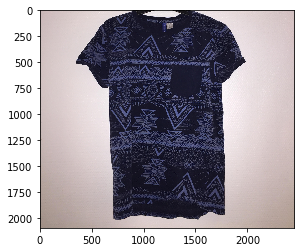

In [495]:
image = get_as_png(original_name, filename)
image_data = np.asarray(image)
plt.imshow(image_data)

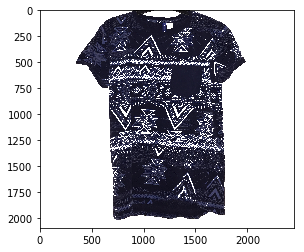

In [496]:
image_data = remove_background(image)
plt.imshow(image_data)

(2018, 1628, 3)


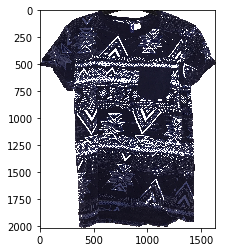

In [497]:
image_data = trim(image_data)
plt.imshow(image_data)
print(image_data.shape)

(28, 22, 3)

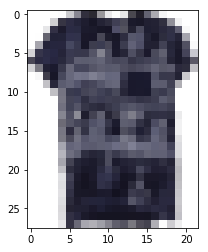

In [498]:
image_data = resize_longest_edge(filename, image_data)
plt.imshow(image_data)
image_data.shape

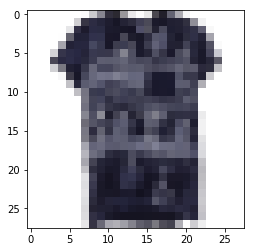

In [499]:
image_data = extend_shortest_edge(filename, image_data)
plt.imshow(image_data)

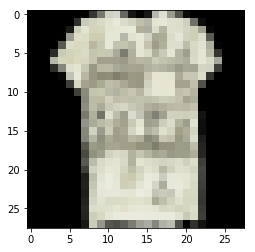

In [500]:
image_data = negate_intensities(image_data)
plt.imshow(image_data)

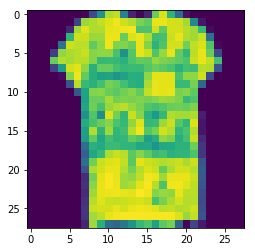

In [501]:
image = convert_to_grayscale(image_data)
plt.imshow(np.asarray(image))

In [502]:
cv2.imwrite(filename, image)

True